### **New York City Taxi Fare Prediction**

**Features**<br>
* pickup_datetime - (timestamp) value indicating when the taxi ride started
* pickup_longitude - (float) for longitude coordinate of where the taxi ride started
* pickup_latitude - (float) for latitude coordinate of where the taxi ride started
* dropoff_longitude - (float) for longitude coordinate of where the taxi ride ended
* dropoff_latitude - (float) for latitude coordinate of where the taxi ride ended
* passenger_count - (integer) indicating the number of passengers in the taxi ride
<br>

**Target**<br>
* fare_amount - (float) dollar amount of the cost of the taxi ride

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from IPython.display import display, Math, Latex

!pip3 install plotly_express
import plotly_express as px

!pip3 install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Read the data from csv
data = pd.read_csv("https://raw.githubusercontent.com/dipika0305/Neural-Network/main/NYC%20Taxi%20Fare.csv");

Let’s take a quick peek at how the data looks like!

In [ ]:
# Viewing the data in file
data.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

As we can see, there are 8 columns total: the unique key, the fare amount and 6 features.

### **Exploratory Data Analysis**

In [ ]:
# Checking data types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['key', 'pickup_datetime']
Numerical Columns :  ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


Let's first look for any null entries in the sample before moving on to the statistics.

In [ ]:
# Checking for missing data values
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

It is clear from above output that none of the columns have any missing data.

#### Pair Plot

To check for independence between predictor variables, we can use Multicollinearity Test and Pair Plots. These tests are used to check if there is a high degree of correlation between the predictor variables.

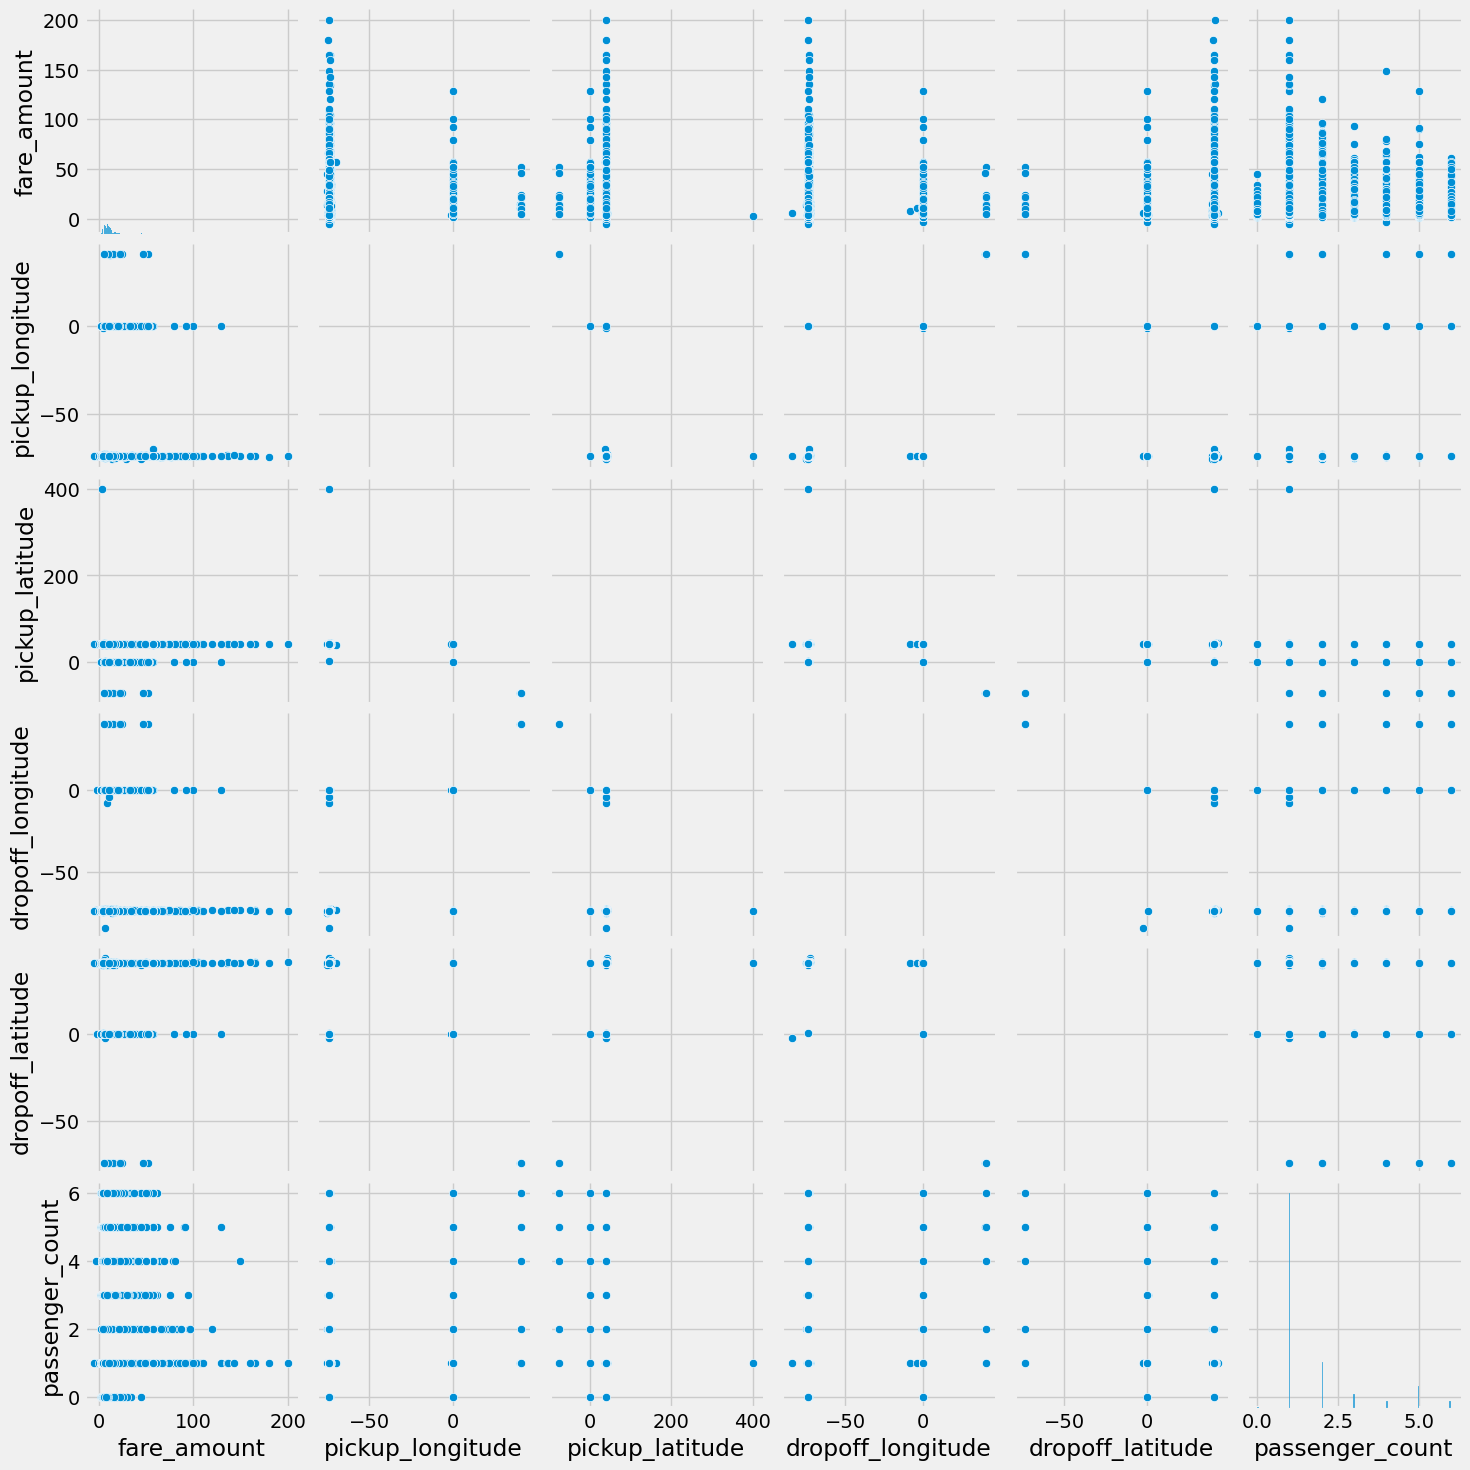

In [ ]:
# Pair plot to check the correlation between predictor variables (collinearity)
sns.pairplot(data)

Pair plots show that there is not much multicollinearity between the predictor variables.

#### Q-Q Plot of the predictor variables

* A quantile-quantile plot is a graphical technique used to determine whether two sets of data come from the same probability distribution.

* In a Q-Q plot, the quantiles of one dataset are plotted against the corresponding quantiles of another dataset. If the two datasets have the same distribution, the plot should show a straight line. Deviations from this line indicate that the two datasets may not have the same distribution.

* Q-Q plots are commonly used in statistics to compare a sample distribution to a theoretical distribution, such as a normal distribution. They can help to identify departures from normality or other expected distributional assumptions.

<Figure size 800x500 with 0 Axes>

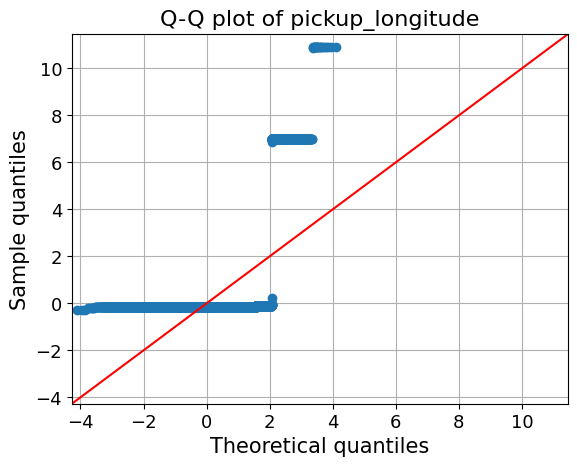

<Figure size 800x500 with 0 Axes>

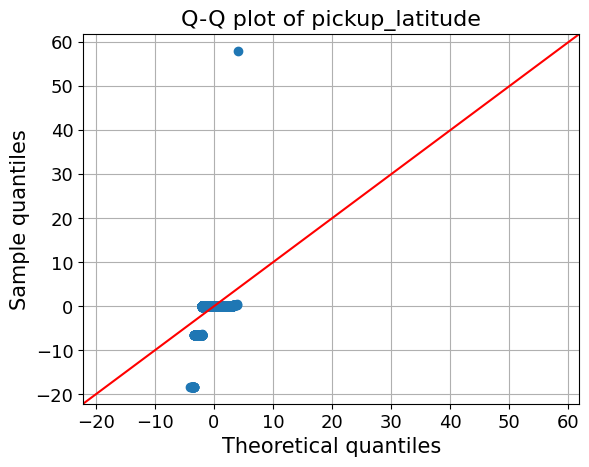

<Figure size 800x500 with 0 Axes>

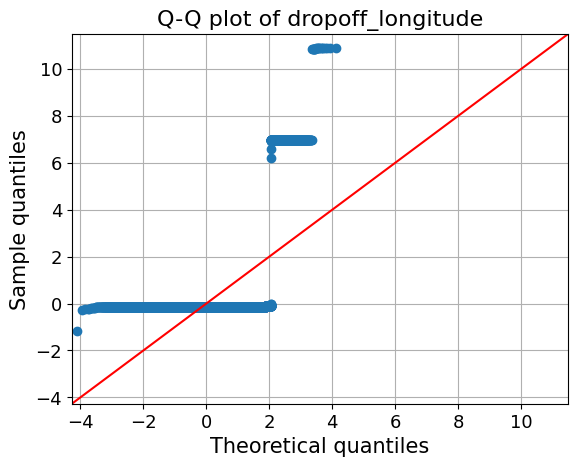

<Figure size 800x500 with 0 Axes>

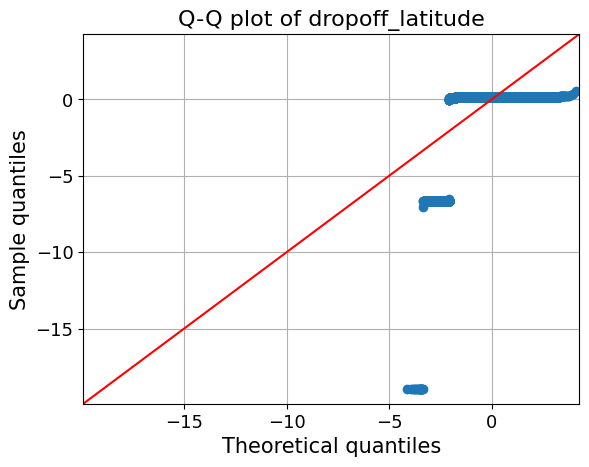

<Figure size 800x500 with 0 Axes>

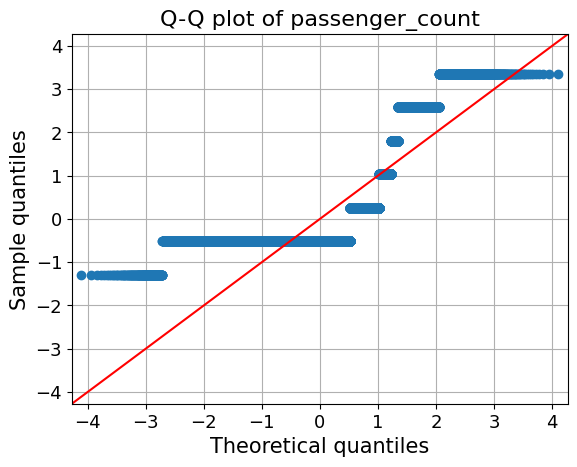

In [ ]:
# Analyzing the distribution of independent variables
data_d = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
for c in data_d.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_d[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

#### Distributions of the numerical predictor variables

Fitting 10 distributions: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


          sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm          0.271592  4743.932371 -606129.158369     inf      0.466964   
expon            0.537028  4205.681852 -572052.560053     inf      0.547765   
gamma            0.544922  4017.749620 -571312.107402     inf      0.535940   
chi2             0.548341  3934.197301 -570999.357755     inf      0.530841   
exponpow         0.632243  1167.845837 -563880.516977     inf      0.660445   

          ks_pvalue  
lognorm         0.0  
expon           0.0  
gamma           0.0  
chi2            0.0  
exponpow        0.0  


Text(0.5, 0, 'Pickup Longitude')

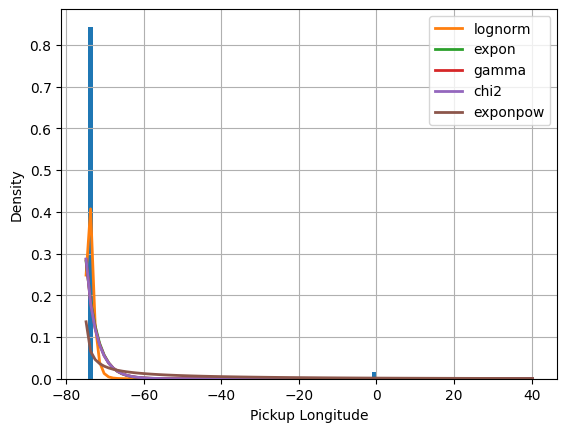

In [ ]:
# Plotting the distribution of Pickup Longitude
pickup_longitude = data["pickup_longitude"].values
f = Fitter(pickup_longitude, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Pickup Longitude")

Fitting 10 distributions: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


          sumsquare_error           aic            bic  kl_div  ks_statistic  \
norm             0.027654  8.852022e+04 -720367.242443     inf      0.524355   
gamma            0.030718           inf -715102.274594     inf      0.518618   
chi2             0.033070  1.717408e+04 -711412.546419     inf      0.489398   
rayleigh         0.041075  1.882138e+03 -700585.651056     inf      0.615258   
cauchy           0.041873  2.924940e+03 -699623.438706     inf      0.081698   

              ks_pvalue  
norm       0.000000e+00  
gamma      0.000000e+00  
chi2       0.000000e+00  
rayleigh   0.000000e+00  
cauchy    9.365171e-291  


Text(0.5, 0, 'Pickup Latitude')

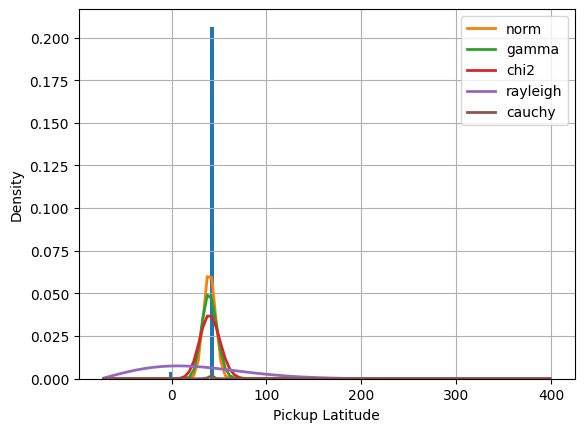

In [ ]:
# Plotting the distribution of Pickup Latitude
pickup_latitude = data["pickup_latitude"].values
f = Fitter(pickup_latitude, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Pickup Latitude")

Fitting 10 distributions: 100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


          sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm          0.085783          inf -663753.306760     inf      0.459548   
rayleigh         0.557593  4308.298684 -570173.610593     inf      0.607840   
norm             0.571108  4232.114911 -568976.142392     inf      0.526848   
exponpow         0.584872  1931.792085 -567774.560737     inf      0.543161   
expon            0.589144  1536.456713 -567421.508579     inf      0.580209   

          ks_pvalue  
lognorm         0.0  
rayleigh        0.0  
norm            0.0  
exponpow        0.0  
expon           0.0  


Text(0.5, 0, 'Dropoff Longitude')

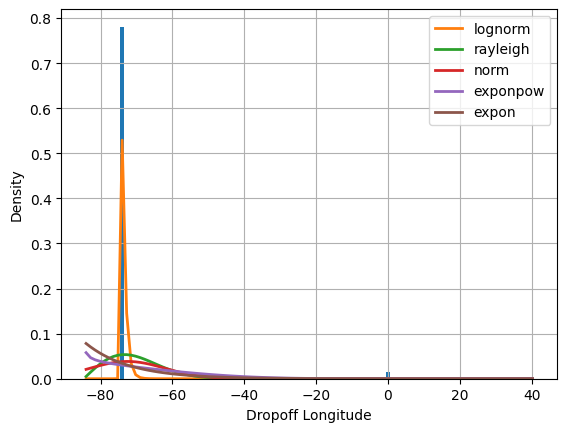

In [ ]:
# Plotting the distribution of Dropoff Longitude
dropoff_longitude = data["dropoff_longitude"].values
f = Fitter(dropoff_longitude, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Dropoff Longitude")

Fitting 10 distributions: 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]

          sumsquare_error           aic            bic  kl_div  ks_statistic  \
cauchy           0.593449   2532.522837 -567057.480218     inf      0.068556   
powerlaw         0.610078   3621.457402 -565664.892945     inf      0.515850   
lognorm          0.618004  12248.205148 -565019.493595     inf      0.522560   
norm             0.618129  12151.791481 -565020.166070     inf      0.524205   
chi2             0.648689  10045.961702 -562596.524056     inf      0.524017   

              ks_pvalue  
cauchy    9.037955e-205  
powerlaw   0.000000e+00  
lognorm    0.000000e+00  
norm       0.000000e+00  
chi2       0.000000e+00  


Text(0.5, 0, 'Dropoff Latitude')

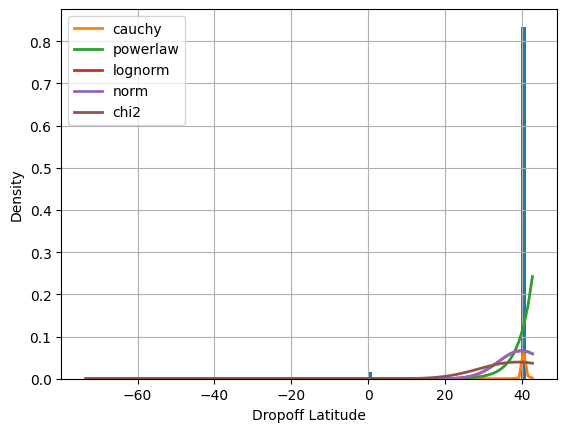

In [ ]:
# Plotting the distribution of Dropoff Latitude
dropoff_latitude = data["dropoff_latitude"].values
f = Fitter(dropoff_latitude, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Dropoff Latitude")

Fitting 10 distributions: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

          sumsquare_error         aic            bic  kl_div  ks_statistic  \
lognorm        134.133403  565.219608 -296014.712517     inf      0.408545   
gamma          135.631729  529.416741 -295459.288024     inf      0.410275   
rayleigh       137.263061  524.501485 -294872.312834     inf      0.465891   
exponpow       138.162766  457.982856 -294534.832151     inf      0.355987   
norm           138.223585  525.856392 -294523.646737     inf      0.397243   

          ks_pvalue  
lognorm         0.0  
gamma           0.0  
rayleigh        0.0  
exponpow        0.0  
norm            0.0  


Text(0.5, 0, 'Passenger Count')

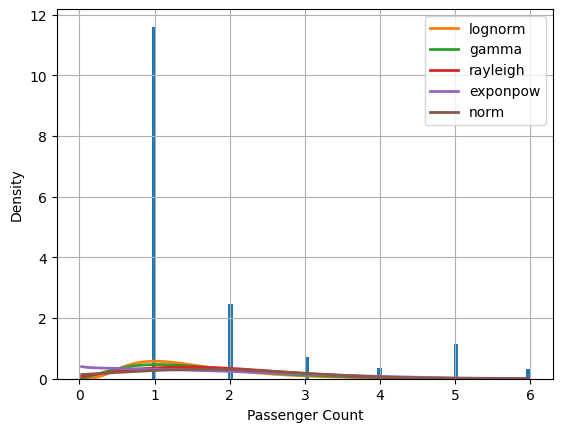

In [ ]:
# Plotting the distribution of Passenger Count
passenger_count = data["passenger_count"].values
f = Fitter(passenger_count, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Passenger Count")

### **Feature Engineering**

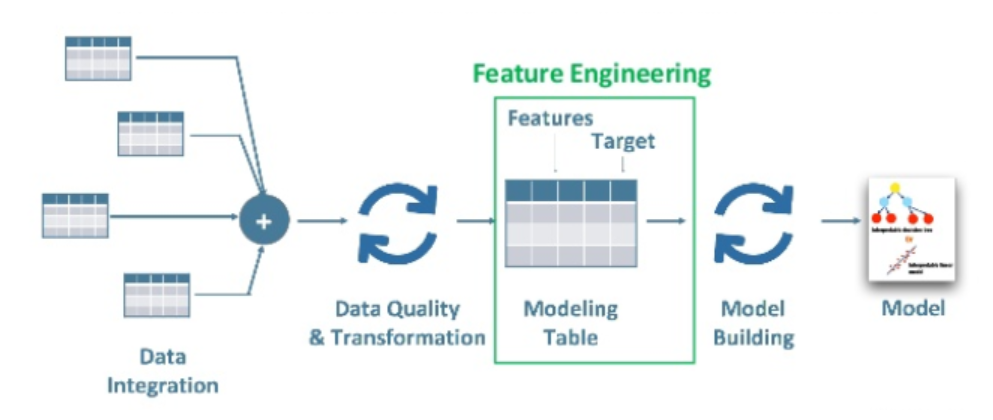

* Feature engineering is the process of selecting and transforming raw data features into features that are more useful for a machine learning model.

* The goal of feature engineering is to improve the performance of a machine learning model by increasing the signal-to-noise ratio in the data, reducing overfitting, and improving the interpretability of the model.

In [ ]:
df = data.copy()

#### Separating the date, time and hour from the Pickup Time

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S UTC")

# Adding time information
df['year'] = df.pickup_datetime.apply(lambda t: t.year)
df['weekday'] = df.pickup_datetime.apply(lambda t: t.weekday())
df['hour'] = df.pickup_datetime.apply(lambda t: t.hour)

#  Removing the key and pickup_datetime column from the dataset
df = df.drop(['key', 'pickup_datetime'], axis=1)
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  weekday  hour  
0         40.712278                1  2009        0    17  
1         40.782004                1  2010        1    16  
2         40.750562                2  2011        3     0  
3         40.758092                1  2012        5     4  
4         40.783762                1  2010        1     7

#### Measuring the Distance (miles) from the latitude and longitude for both pickup and dropoff

In [ ]:
def distance(lat1, lon1, lat2, lon2):

    p = 0.017453292519943295 # Pi/180
    d = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(d)) # 2*R*asin...

In [ ]:
df['distance'] = distance(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)

df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  weekday  hour  distance  
0         40.712278                1  2009        0    17  0.640487  
1         40.782004                1  2010        1    16  5.250670  
2         40.750562                2  2011        3     0  0.863411  
3         40.758092                1  2012        5     4  1.739386  
4         40.783762                1  2010        1     7  1.242218

### **Data Cleaning**

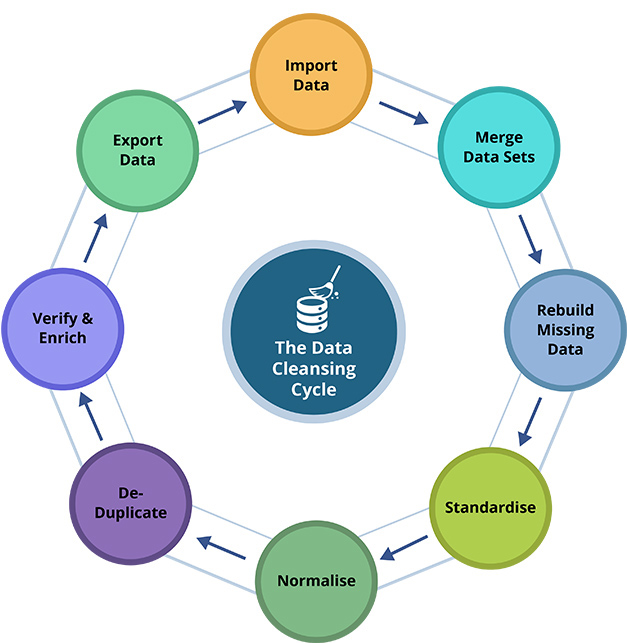

* Data cleaning entails dealing with errors, discrepancies, missing numbers, outliers, and other problems that could impair the data's quality.

* This is crucial because when employed in machine learning models, bad data can produce false or misleading insights, bad judgment, and wrong forecasts.

In [ ]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  48542.000000      48542.000000     48542.000000       48542.000000   
mean      11.367742        -73.858914        40.676474         -73.855140   
std        9.561139          3.230272         3.053854           3.260416   
min        0.010000        -75.423848       -74.006893         -84.654241   
25%        6.000000        -73.992300        40.736422         -73.991324   
50%        8.500000        -73.982124        40.753387         -73.980477   
75%       12.500000        -73.968424        40.767738         -73.965335   
max      200.000000         40.783472       401.083332          40.851027   

       dropoff_latitude  passenger_count          year       weekday  \
count      48542.000000     48542.000000  48542.000000  48542.000000   
mean          40.669579         1.670389   2011.745355      3.032014   
std            2.579612         1.291765      1.866528      1.955776   
min          -74.006377         0.000000   2009.000000      0.000000   
25%           40.735770         1.000000   2010.000000      1.000000   
50%           40.754057         1.000000   2012.000000      3.000000   
75%           40.768482         2.000000   2013.000000      5.000000   
max           43.415190         6.000000   2015.000000      6.000000   

               hour      distance  
count  48542.000000  48542.000000  
mean      13.485806     11.735611  
std        6.503591    222.897388  
min        0.000000      0.000045  
25%        9.000000      0.801454  
50%       14.000000      1.361515  
75%       19.000000      2.480655  
max       23.000000   5385.932977

The fare_amount appears to range from -\$5 to $200 which makes no sense.

#### Removing the fare price less than zero

In [ ]:
df = df[df.fare_amount > 0]

#### Removing the distance less than zero

In [ ]:
df = df[df.distance > 0]

### **Data Visualization**

#### Visualizing the geospatial locations for the pickup points

In [ ]:
tPickup_fig = px.scatter_mapbox(df, lat='pickup_latitude', lon='pickup_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
    color='fare_amount',color_continuous_scale=px.colors.sequential.Agsunset, opacity=.05,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tPickup_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tPickup_fig.show()

#### Visualizing the geospatial locations for the dropoff points

In [ ]:
tDropoff_fig = px.scatter_mapbox(df, lat='dropoff_latitude', lon='dropoff_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
    color='fare_amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tDropoff_fig.show()

#### Histrogram plot of Fare Price

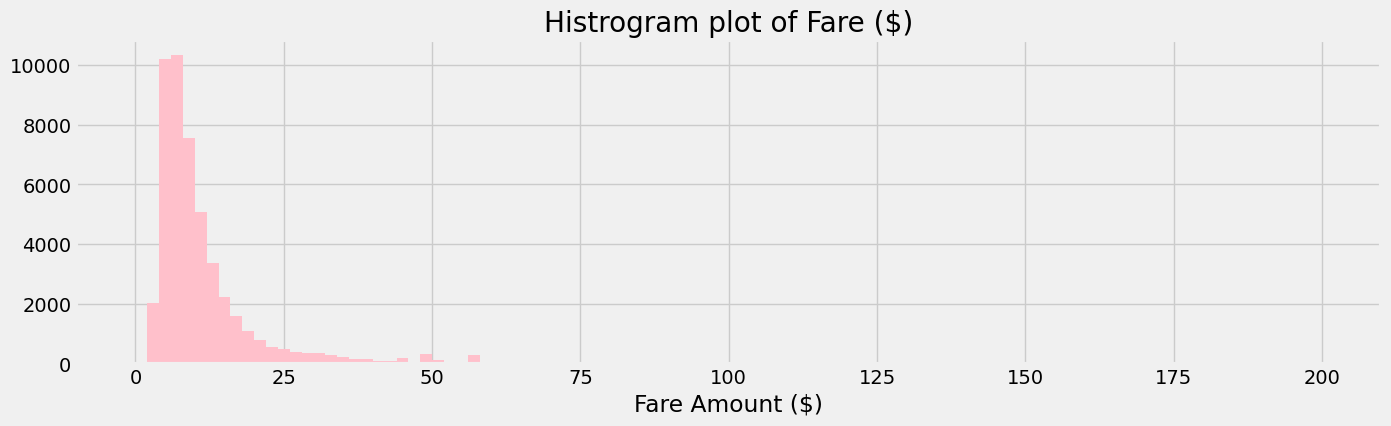

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))
plt.hist(df['fare_amount'], bins=100, color='pink')
plt.xlabel("Fare Amount ($)")
plt.title("Histrogram plot of Fare ($)")
plt.show()

As we can see from the above graph that for most rides the price is less than \$20.

#### Barplot for visualizing the Number of Rides in the following years

[Text(0, 0, '7536'),
 Text(0, 0, '7350'),
 Text(0, 0, '7547'),
 Text(0, 0, '7734'),
 Text(0, 0, '7635'),
 Text(0, 0, '7361'),
 Text(0, 0, '3379')]

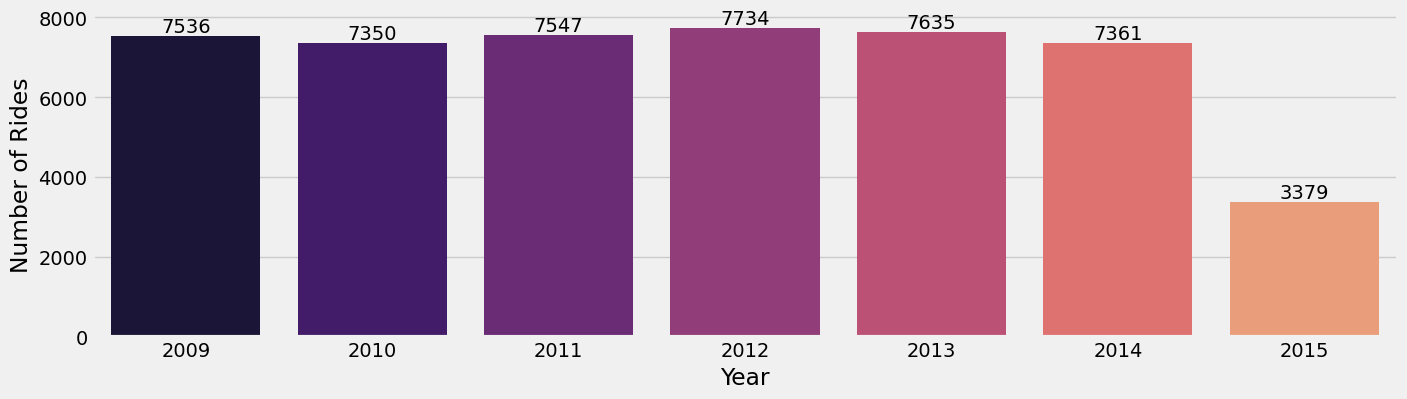

In [ ]:
insight_year = df.year.value_counts()
palette = sns.color_palette("magma", 8)
plt.figure(figsize=(15, 4))
ax = sns.barplot(data=df, x=insight_year.index, y=insight_year.values, palette=palette)
plt.ylabel("Number of Rides")
plt.xlabel("Year")
ax.bar_label(ax.containers[0], fmt='%d')

We can see that maximum Number of Rides are 7734 taken in year 2012.

#### Traffic in the year 2014

In [ ]:
yr2014_insight = df[df['year'] == 2014]

xlim = [-74.03, -73.85]
ylim = [40.70, 40.85]

yr2014_traffic_insight = yr2014_insight.copy()
yr2014_insight = yr2014_insight[(yr2014_insight.pickup_longitude > xlim[0]) & (yr2014_insight.pickup_longitude < xlim[1])]
yr2014_insight = yr2014_insight[(yr2014_insight.dropoff_longitude > xlim[0]) & (yr2014_insight.dropoff_longitude < xlim[1])]
yr2014_insight = yr2014_insight[(yr2014_insight.pickup_latitude > ylim[0]) & (yr2014_insight.pickup_latitude < ylim[1])]
yr2014_insight = yr2014_insight[(yr2014_insight.dropoff_latitude > ylim[0]) & (yr2014_insight.dropoff_latitude < ylim[1])]

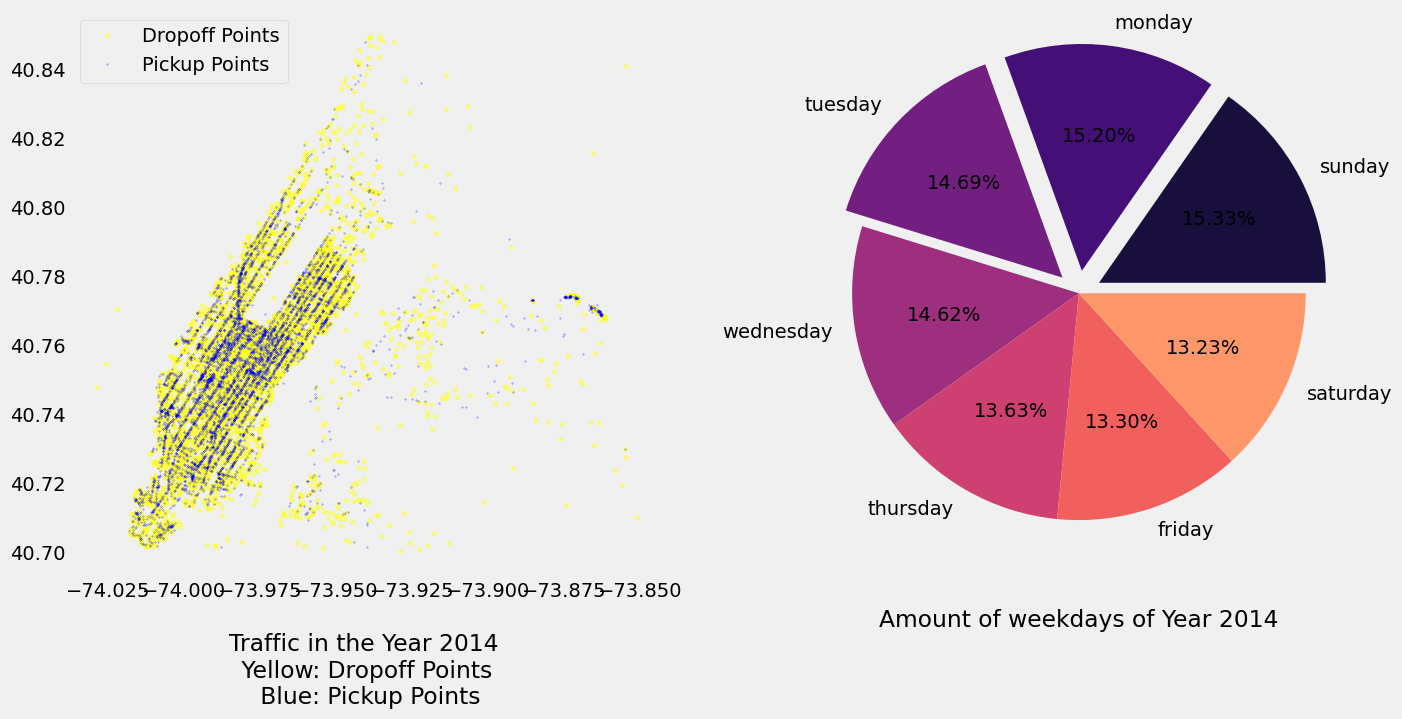

In [ ]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(yr2014_insight.dropoff_longitude, yr2014_insight.dropoff_latitude, 'o', alpha = .5, markersize = 2, color="#fff", markeredgecolor='yellow', markeredgewidth=1.5)
plt.plot(yr2014_insight.pickup_longitude, yr2014_insight.pickup_latitude, '.', alpha = .8, markersize = .5, color="blue")
plt.legend(['Dropoff Points', "Pickup Points"])
plt.xlabel("\nTraffic in the Year 2014 \n Yellow: Dropoff Points \n Blue: Pickup Points")
plt.grid(False)

plt.subplot(1, 2, 2)
days_list = {'sunday' : 0, 'monday' : 1, 'tuesday' : 2, 'wednesday' : 3, 'thursday' : 4, 'friday' : 5, 'saturday' : 6}

weeklyTraffic = yr2014_insight['weekday'].value_counts()
plt.pie(weeklyTraffic.values, labels=days_list, autopct="%.2f%%", explode=[0.1, 0.1, 0.1, 0, 0, 0, 0], colors=palette)
plt.xlabel("\nAmount of weekdays of Year 2014")
plt.show()

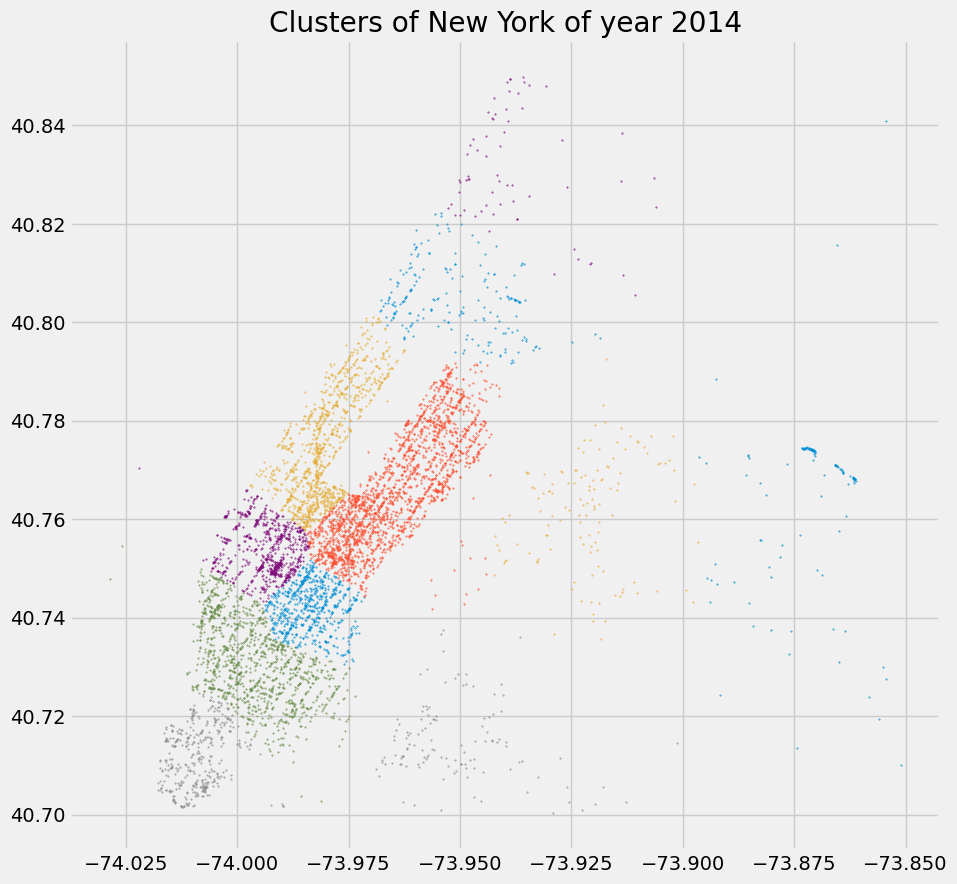

In [ ]:
loc_df = pd.DataFrame()
loc_df['longitude'] = yr2014_insight.dropoff_longitude
loc_df['latitude'] = yr2014_insight.dropoff_latitude


kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

plt.figure(figsize = (10, 10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 0.8)

plt.title('Clusters of New York of year 2014')
plt.show()

 #### Peak days with their rush hours of year 2014

In [ ]:
def viz_peakDays(day, color='r'):
    yr2014_monday_insight = yr2014_insight[yr2014_insight["weekday"] == day]
    day_name = list(days_list.keys())[day]
    plt.figure(figsize = (15, 70))

    max_pickup, max_pgcnt = 0, 0

    for hrs in range(24):
        specDay_traffic = yr2014_monday_insight[yr2014_monday_insight['hour'] == hrs]
        pickup = len(specDay_traffic)
        pgn_cnt = specDay_traffic["passenger_count"].sum()

        max_pickup = max(max_pickup, pickup)
        max_pgcnt = max(max_pgcnt, pgn_cnt)

        longitude = list(specDay_traffic.pickup_longitude) + list(specDay_traffic.dropoff_longitude)
        latitude = list(specDay_traffic.pickup_latitude) + list(specDay_traffic.dropoff_latitude)
        plt.subplot(24, 6, hrs+1)

        plt.title("\nHour: " + str(hrs) + " [pickup="+ str(pickup)+",\npassengers count="+ str(pgn_cnt)+"] ", fontsize=12)

        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.plot(longitude,latitude,'.', alpha = 0.6, markersize = 10, color=color)

    plt.suptitle("\n"+ day_name.capitalize() +" (max pickups=" + str(max_pickup) + ", max passengers=" + str(max_pgcnt) + ")\n\n\n\n\n\n", fontsize=20)
    plt.tight_layout()
    plt.show()

##### Visualizing the rush hours for Sunday

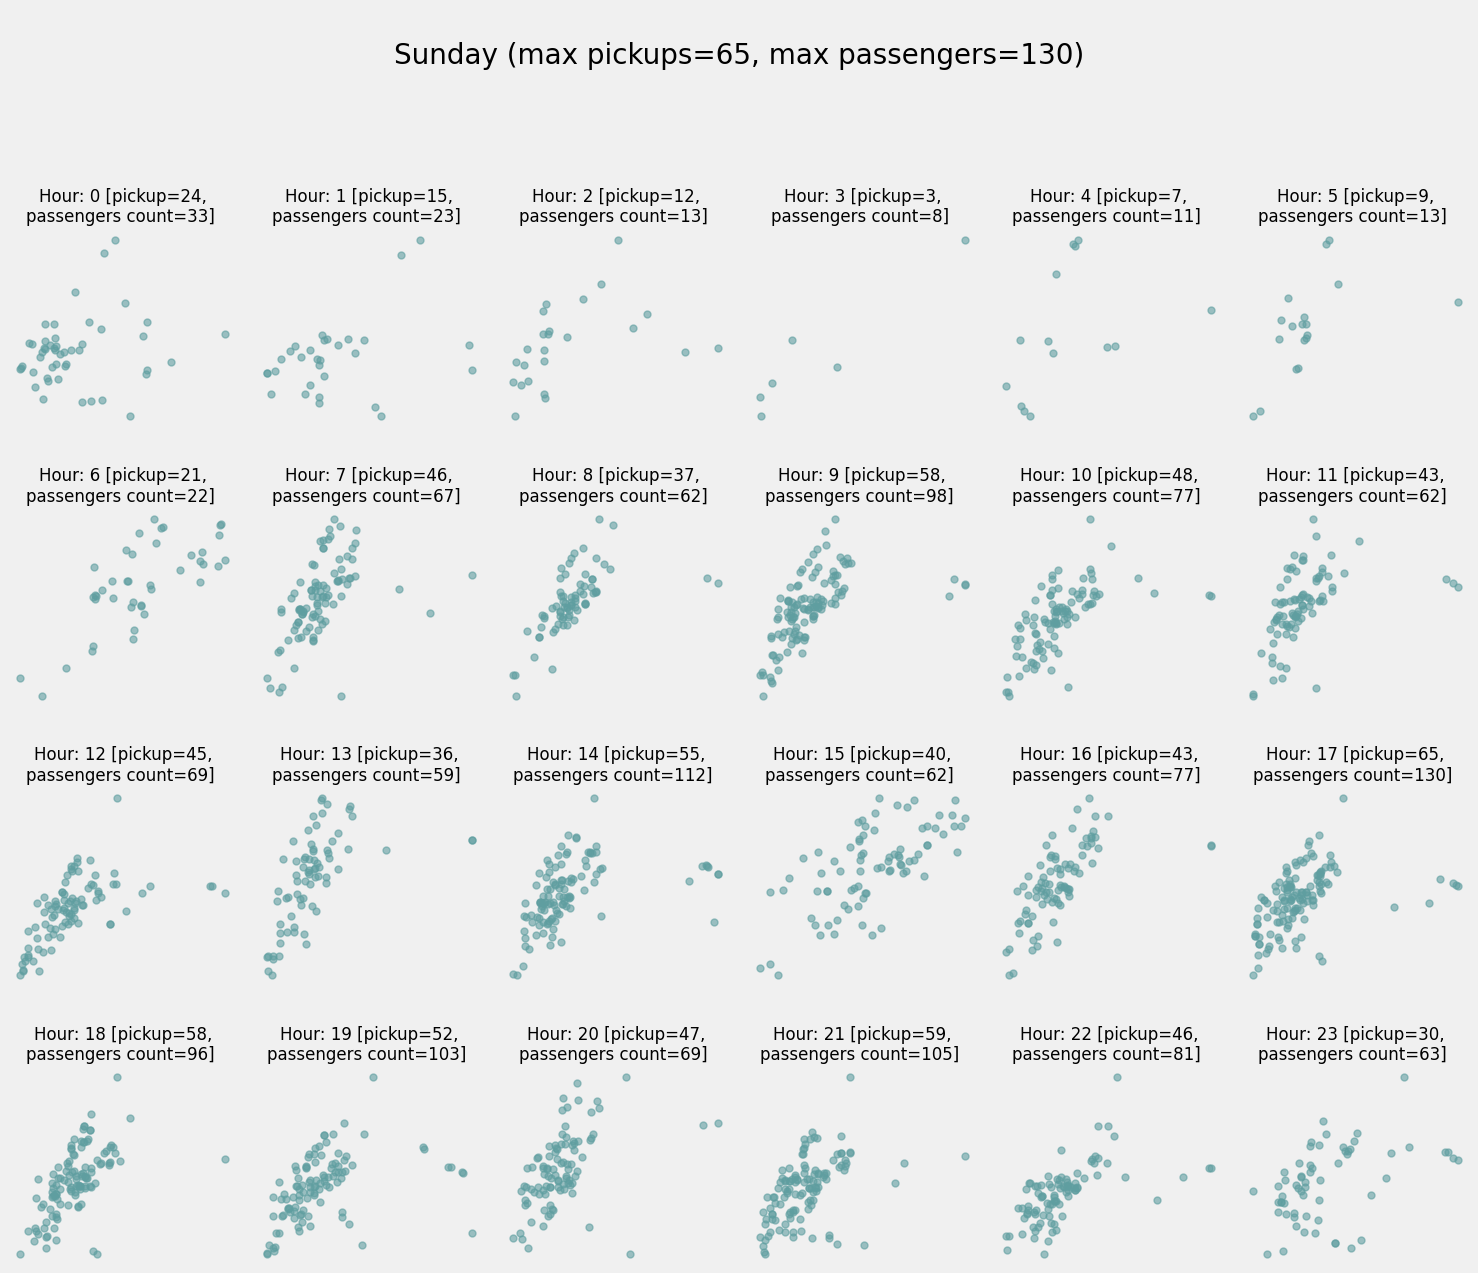

In [ ]:
viz_peakDays(0, color='cadetblue')

##### Visualizing the rush hours for Monday

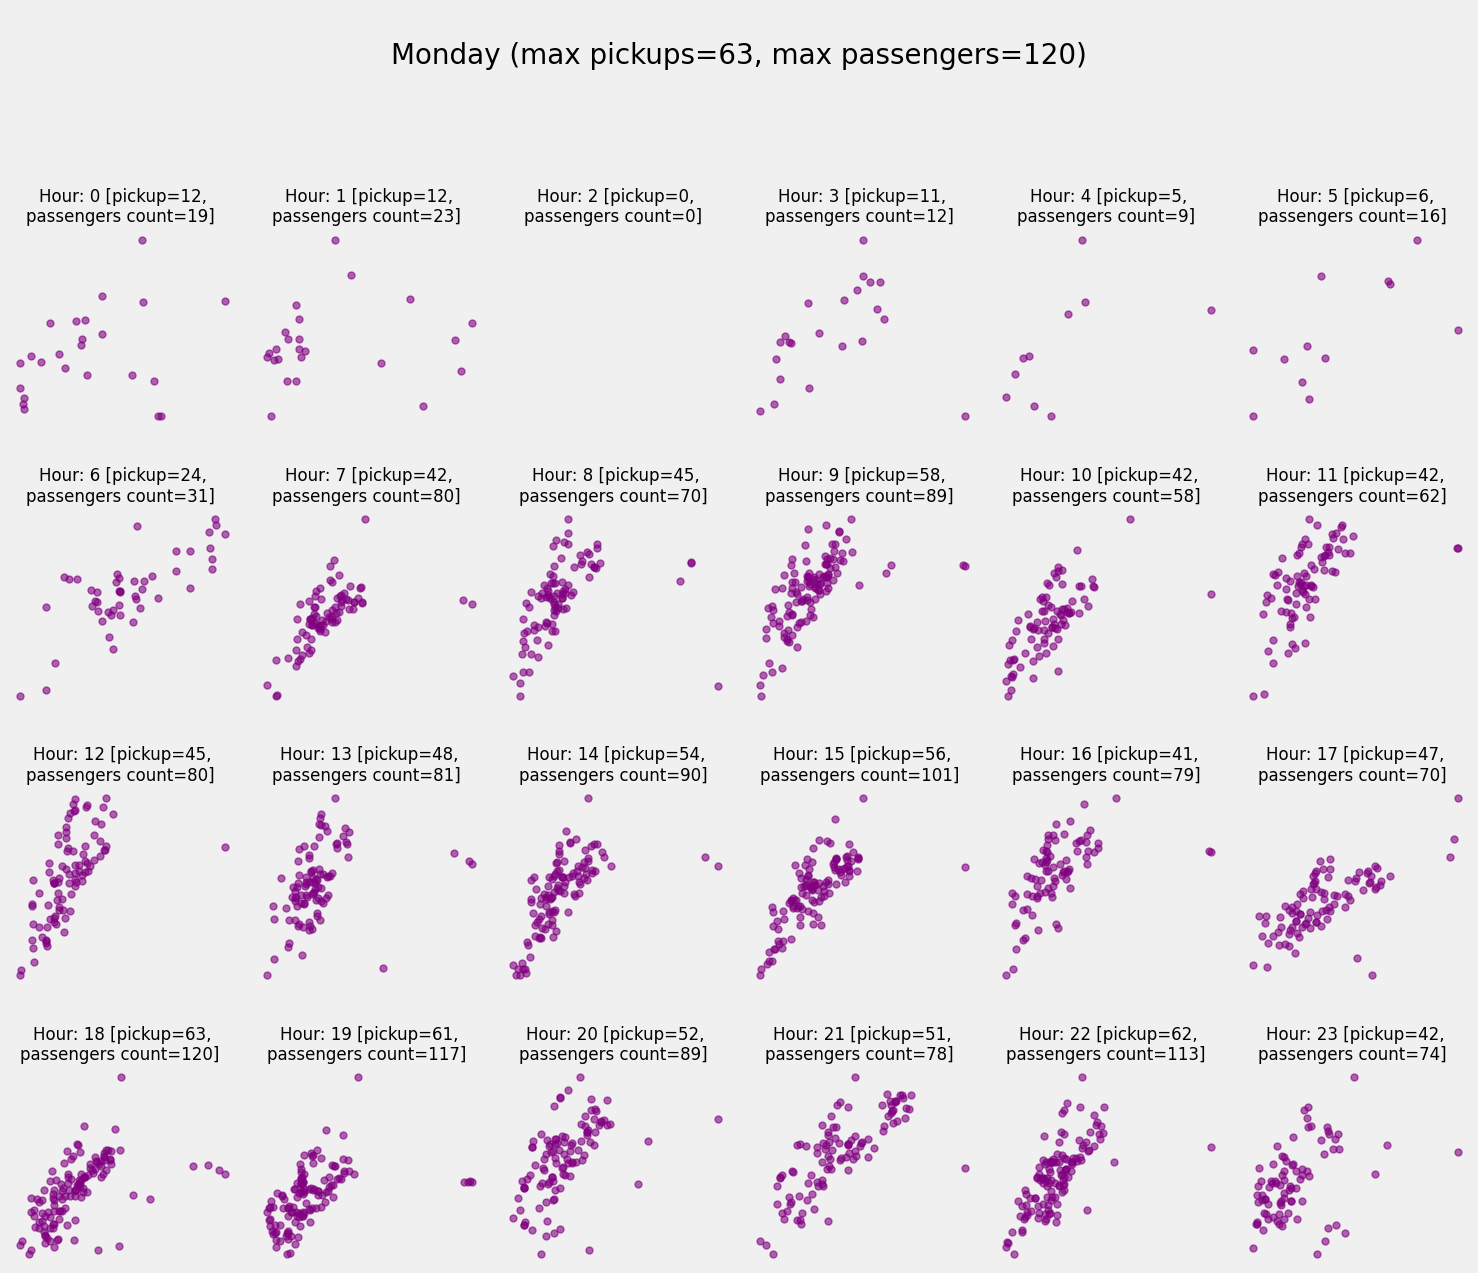

In [ ]:
viz_peakDays(1, color='purple')

##### Visualizing the rush hours for Friday

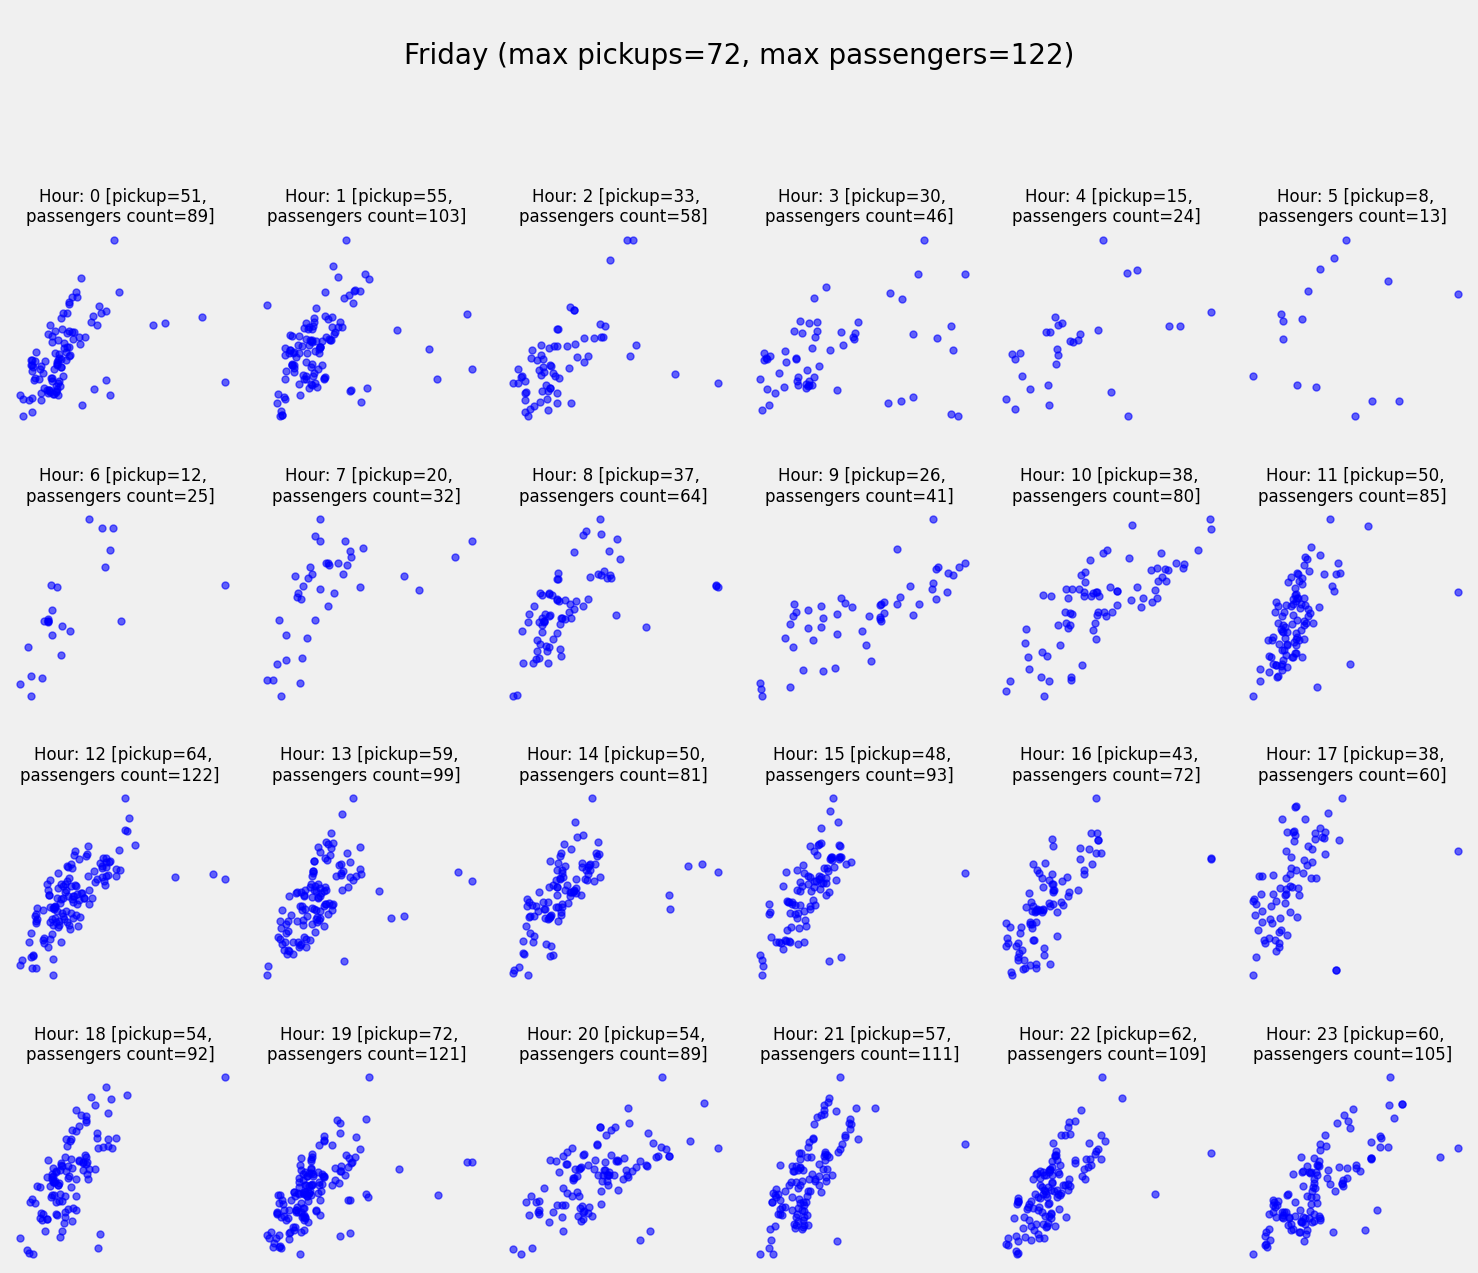

In [ ]:
viz_peakDays(5, color='blue')

We can observe from the above visualizations that Sunday had the most number of pickups and passengers among Sunday, Monday, and Friday

#### Histrogram plot for the Distance (miles) traveled

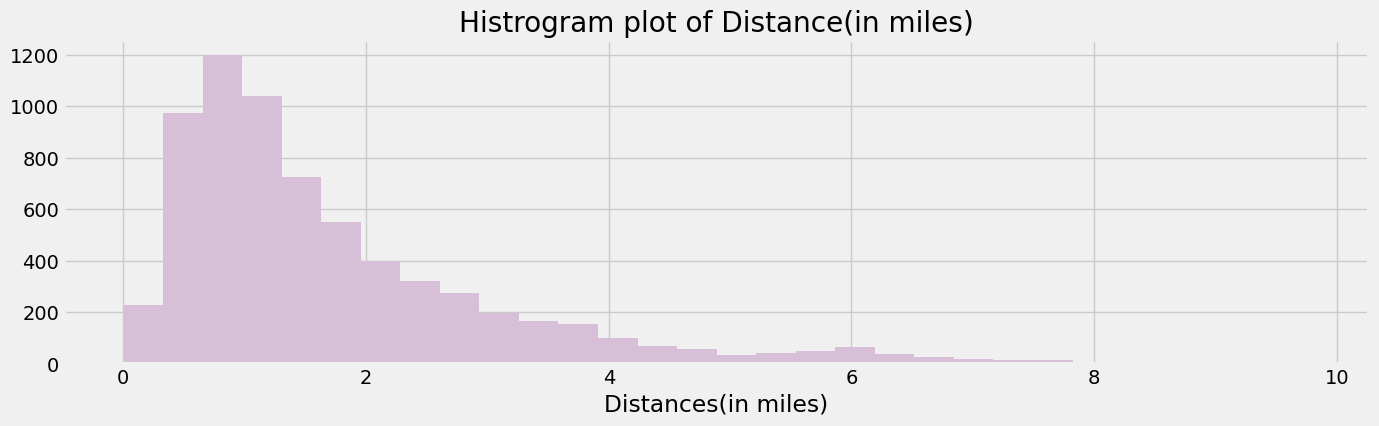

In [ ]:
yr2014_insight.distance.hist(bins=30, figsize=(15,4), color='thistle')
plt.xlabel("Distances(in miles)")
plt.title("Histrogram plot of Distance(in miles)")
plt.show()

This histrogram shows that most of the ride taken were short rides.

In [ ]:
yr2014_insight.groupby('passenger_count')['distance', 'fare_amount'].mean()

<ipython-input-33-2b598b5bf93a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



distance  fare_amount
passenger_count                       
0                0.113254     3.000000
1                1.725644    11.238850
2                1.835900    11.999661
3                1.679347    10.695918
4                1.579072    11.393538
5                1.811797    11.793846
6                1.720937    11.179669

In [ ]:
print("Average USD($)/Mile : {:0.2f}".format(yr2014_insight.fare_amount.sum()/yr2014_insight.distance.sum()))

Average USD($)/Mile : 6.52


#### Scatter plot visualization between Fare($USD) vs Distance(Miles) of year 2014

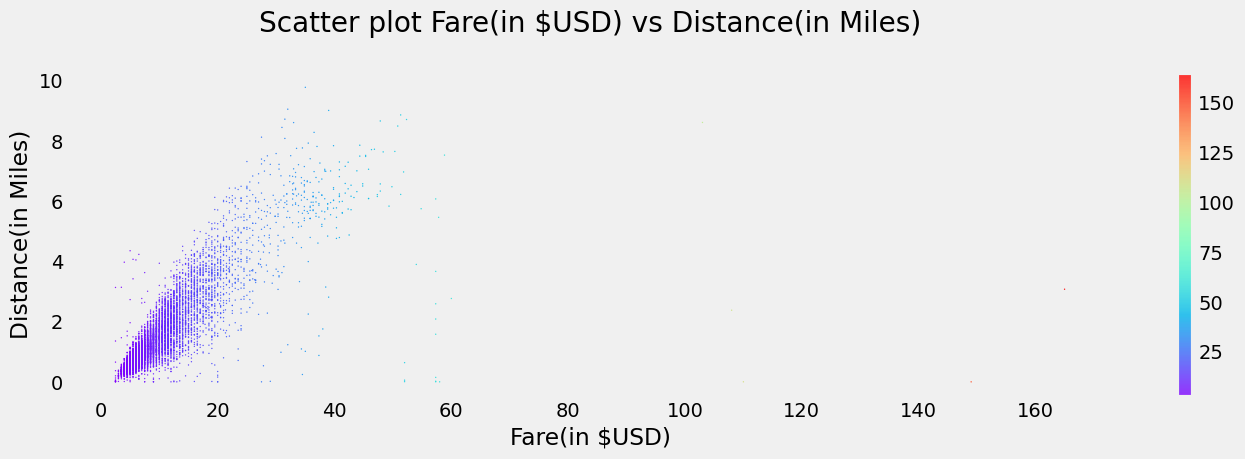

In [ ]:
plt.figure(figsize=(15,4))

plt.scatter(yr2014_insight.fare_amount, yr2014_insight.distance, c=yr2014_insight.fare_amount, cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("Fare(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

As we can see from above graph that there are trips with zero distance but with a non-zero fare. Predicting these fares will be difficult as there is likely not sufficient information in the dataset.


In [ ]:
# Removing datapoints with distance < 0.05 miles

print("Old size: ", len(df))
train_df = df[df.distance >= 0.05]

print("New size: ", len(train_df))

Old size:  48542
New size:  48277


### **Building a model**

In [ ]:
model_df = train_df[['year', 'hour', 'distance', 'passenger_count', 'fare_amount']]
model_df.head()

year  hour  distance  passenger_count  fare_amount
0  2009    17  0.640487                1          4.5
1  2010    16  5.250670                1         16.9
2  2011     0  0.863411                2          5.7
3  2012     4  1.739386                1          7.7
4  2010     7  1.242218                1          5.3

#### Test and Train Split

In [ ]:
# Specifying the predicted value
y = model_df[['fare_amount']]

# Specifying the predictor values and dropping fare_amount from data
x = model_df.drop(['fare_amount'], axis = 1)

print(x.head())

   year  hour  distance  passenger_count
0  2009    17  0.640487                1
1  2010    16  5.250670                1
2  2011     0  0.863411                2
3  2012     4  1.739386                1
4  2010     7  1.242218                1


In [ ]:
# Spliting data into Training set 75% and Test set 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

#### Support Vector Machine

* Support Vector Machine (SVM) is a powerful and widely used machine learning algorithm that is used for prediction, classification, regression, and outlier detection.

* SVM is particularly useful when dealing with complex datasets that have multiple dimensions and non-linear relationships between features.

* The basic idea behind SVM is to find a hyperplane (i.e., a line, in the case of two dimensions) that best separates the data points into different classes.

* The hyperplane is chosen such that it maximizes the margin, which is the distance between the hyperplane and the closest data points of each class.

* The data points that are closest to the hyperplane are known as support vectors, hence the name Support Vector Machine.

* One of the key strengths of SVM is its ability to find a non-linear boundary that separates data points of different classes. This is done by using a technique called the kernel trick, which maps the data to a higher-dimensional space where it becomes separable by a linear boundary. The kernel trick allows SVM to model complex relationships between the input variables without explicitly computing them.



Here are some of the key formulas used in SVMs:

1. **Decision function:** SVMs use a decision function to classify data points into different categories. The decision function is given by:

   $f(x) = sign(w^T x + b)$

   where **x** is the input feature vector, **w** is the weight vector, **b** is the bias term, and **sign** is the sign function that outputs +1 or -1 depending on the sign of the argument. This formula is used to classify new data points based on their features.

2. **Margin:** The margin is the distance between the decision boundary and the closest data point. SVMs aim to maximize the margin, which is given by:

     $margin = 2 / ||w||$
     
     where **||w||** is the Euclidean norm of the weight vector. The margin formula is used to ensure that the decision boundary is as far away from the data points as possible, which reduces overfitting and improves generalization.

3. **Optimization objective:** The SVM optimization problem is formulated as follows:

     $min_w,b (1/2) * ||w||^2 + C * Σ(max(0, 1-yi(w^T xi + b)))$

     where **C** is a hyperparameter that controls the tradeoff between maximizing the margin and minimizing the classification error, **yi** is the true class label of data point **xi**, and the second term represents the classification error. This formula is used to find the optimal values of **w** and **b** that minimize the classification error subject to the margin constraint.

Overall, these formulas are used to train an SVM model that maximizes the margin between the decision boundary and the data points, while also minimizing the classification error. The decision function is then used to classify new data points based on their features.

In [ ]:
# Creating SVM model
svm_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Training the model
svm_model.fit(x_train, y_train)

# Making predictions on Test dataset
y_pred = svm_model.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Squared Error: 136.506823


#### **Mean Squared Error**

* MSE is an evaluation metric commonly used in regression analysis to measure the average squared difference between the predicted values and the true values.

* It is given by the formula:

   $MSE = 1/n * Σ(y_true - y_pred)^2$

  where **n** is the number of data points, **y_true** are the true values, and **y_pred** are the predicted values.

* The MSE metric calculates the average squared difference between the predicted and actual values, which makes it sensitive to larger errors.

* MSE is often used in regression problems to evaluate the performance of machine learning models, with lower values indicating better performance.

In [ ]:
# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %f" % (mse))

#### **Mean Absolute Error**

* MAE is an evaluation metric commonly used in regression analysis to measure the average absolute difference between the predicted values and the true values.

* It is given by the formula:

  $MAE = 1/n * Σ|y_true - y_pred|$

  where **n** is the number of data points, **y_true** are the true values, and **y_pred** are the predicted values.
  
* The MAE metric calculates the average absolute difference between the predicted and actual values, which makes it less sensitive to larger errors than the MSE metric.

* MAE is often used in regression problems to evaluate the performance of machine learning models, with lower values indicating better performance.

* Compared to MSE, it has the advantage of being less sensitive to outliers in the data.

* Overall, MAE is a useful metric for assessing the performance of a regression model, particularly when there are outliers in the data. However, like with MSE, it is often used in conjunction with other evaluation metrics to gain better understanding of a model's performance.

In [ ]:
# Calculating the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.174840310281096


### **Conclusion**

This notebook aimed to predict the fare amount of taxi trips in New York City based on various features such as distance, time of day, and location. To achieve this, we performed exploratory data analysis, data cleaning, feature engineering, and training a SVM model.

The exploratory data analysis helped us to gain insights into the dataset and identify any issues such as missing values, outliers, and inconsistencies. We then performed data cleaning to address these issues and prepare the data for modeling.

Feature engineering was a critical step in this notebook, as we created several new features based on the existing ones that could potentially improve the performance of the model such as 'Date', 'Time', and 'Hour' from 'Pickup Time'.

Finally, we trained a SVM model using the processed data, and achieved a mean absolute error (MAE) of $9.17 on the test set. This suggests that our model is able to accurately predict the fare amount of taxi trips in New York City with reasonable accuracy.

### **References**

* https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* https://rishabhrahatgaonkar.medium.com/lets-understand-feature-engineering-with-nyc-taxi-fare-prediction-4fe44dc1556e
* https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data?select=train.csv


### **MIT License**

Copyright (c) 2023 Dipika Mohanty

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.